In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [5]:
df.shape

(150, 5)

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

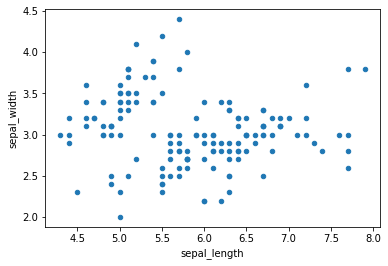

In [7]:
df.plot(kind='scatter',x = 'sepal_length',y='sepal_width')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


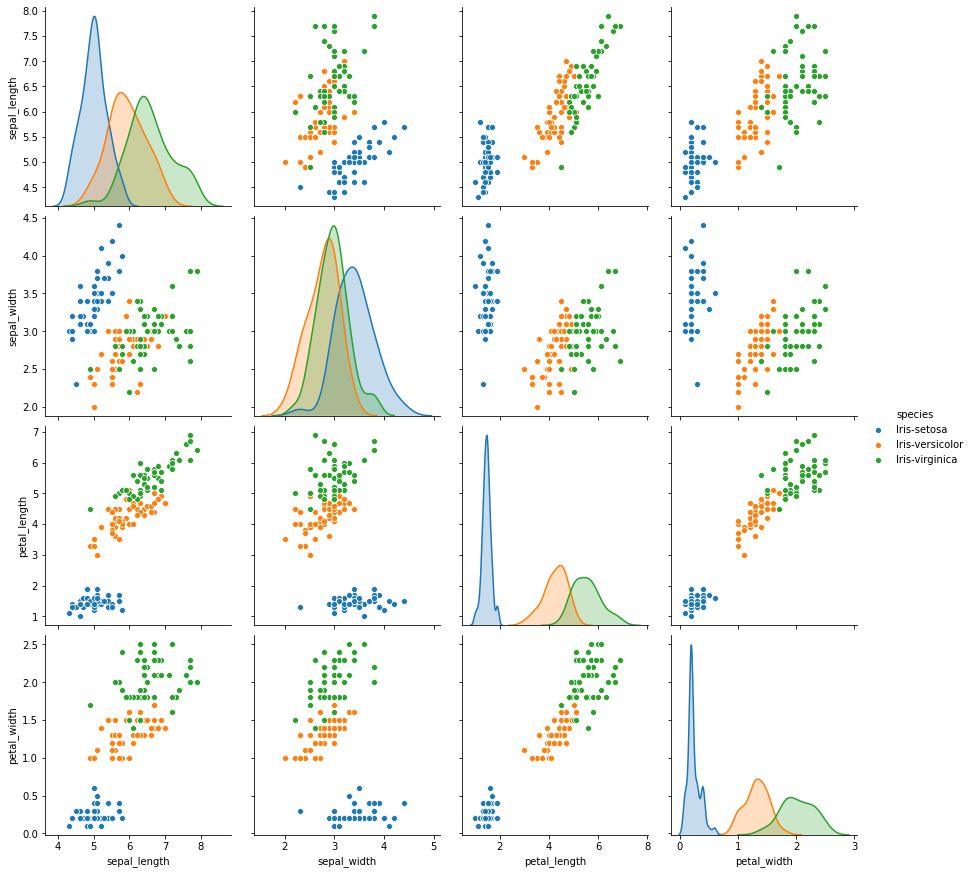

In [8]:
sns.pairplot(df, hue="species", size=3);

In [9]:
x = df.drop(['species'],axis=1)
y = df['species']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
print(x.columns)
print(y.unique())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train) 

DecisionTreeClassifier()

[Text(313.875, 733.86, 'X[3] <= 0.8\ngini = 0.664\nsamples = 120\nvalue = [44, 40, 36]'),
 Text(209.25, 570.78, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(418.5, 570.78, 'X[3] <= 1.65\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(209.25, 407.70000000000005, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(104.625, 244.62, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(313.875, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(627.75, 407.70000000000005, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(523.125, 244.62, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(418.5, 81.54000000000008, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(627.75, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(732.375, 244.62, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

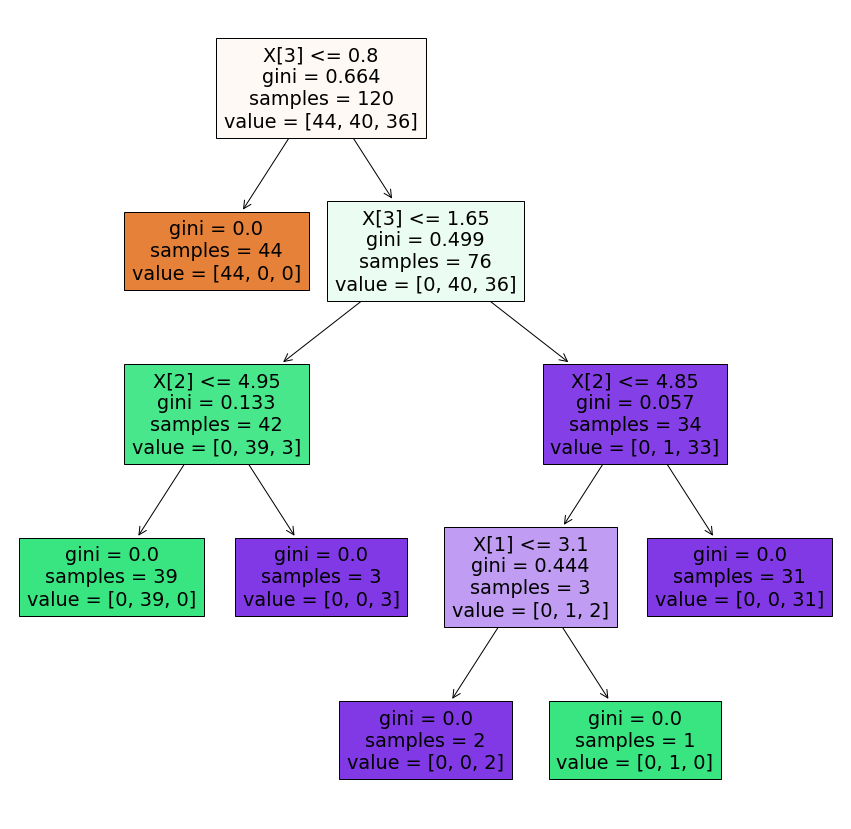

In [13]:
plt.figure(figsize = (15,15))
tree.plot_tree(classifier, filled = True)

In [14]:
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 679.5, 'X[3] <= 0.8\ngini = 0.664\nsamples = 120\nvalue = [44, 40, 36]'),
 Text(167.4, 407.69999999999993, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(502.20000000000005, 407.69999999999993, 'X[3] <= 1.65\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(334.8, 135.89999999999998, 'gini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(669.6, 135.89999999999998, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

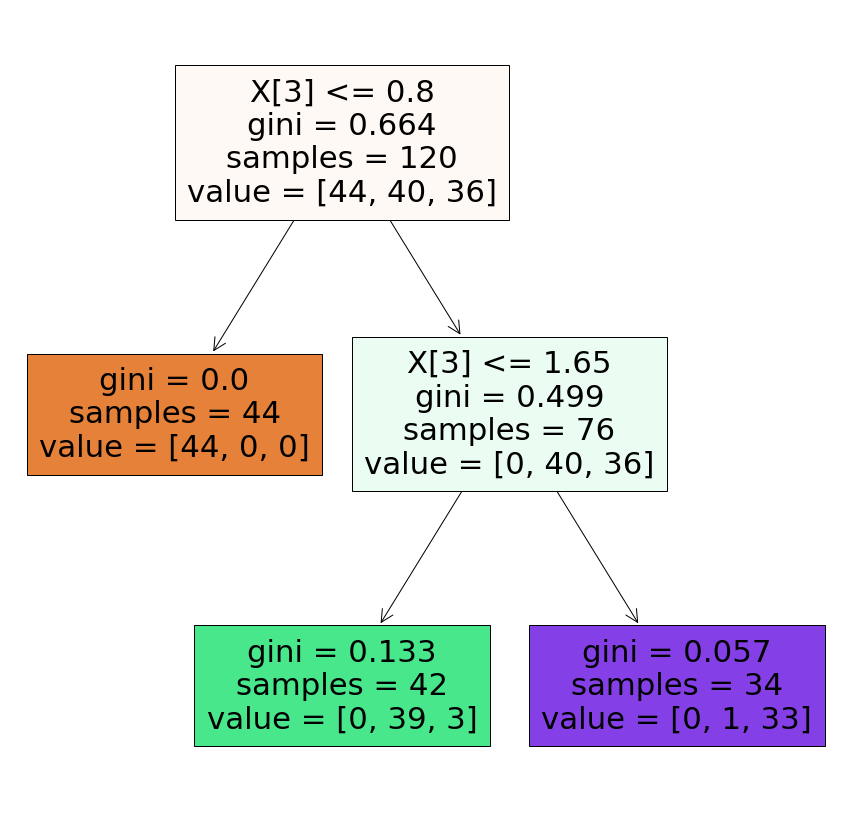

In [15]:
plt.figure(figsize = (15,15))
tree.plot_tree(classifier, filled = True)

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
params = {
    'max_leaf_nodes' : list(range(2, 10)),
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : list(range(1, 100)),
    'min_impurity_decrease' : [0.0001, 0.001, 0.01, 0.1]
}

In [20]:
clf= RandomizedSearchCV(estimator =classifier, param_distributions = params,
                               cv = 5, verbose = 1)
# Fitting the model
clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'min_impurity_decrease': [0.0001, 0.001,
                                                                  0.01, 0.1],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4

In [21]:
print(clf.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=9,
                       min_impurity_decrease=0.01, min_samples_leaf=16)


In [22]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=4,
                       min_impurity_decrease=0.1, min_samples_leaf=29)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=4,
                       min_impurity_decrease=0.1, min_samples_leaf=29)

In [23]:
y_pred = classifier.predict(x_test)

In [31]:
Accuracy_test = metrics.accuracy_score(y_test,y_pred)

In [32]:
print('The Testing Accuracy is : ', Accuracy_test)

The Testing Accuracy is :  0.9333333333333333


In [26]:
x_pred = classifier.predict(x_train)

In [29]:
Accuracy_train = metrics.accuracy_score(x_pred,y_train)

In [28]:
print('The Training Accuracy is : ', Accuracy_train)

The Training Accuracy is :  0.9666666666666667
